In [2]:
import Yolo_Cars
import Extract_Frames
import PysceneDetect_Function
import LicensePlate
import Parking_Charge

In [6]:
import cv2
import pandas as pd
import math
from skimage.io import imread
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
from skimage import measure
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import skimage
from skimage import img_as_uint
import pytesseract
from PIL import Image
import os
from glob import glob

In [9]:
#Change the path accoridngly
path = "yolo-object-detection/Parking.MOV"
Yolo_Cars.yolo(path)

In [10]:
#Running pyscene detect to get the scene list saved in the output csv file
output_csv_file = "output/scenelist.csv"
PysceneDetect_Function.pyscenedetect(path,output_csv_file)

100%|█████████▉| 4980/4984 [02:24<00:00, 25.39frames/s]

List of scenes obtained:
Scene  1: Start 00:00:00.000 / Frame 0, End 00:00:09.000 / Frame 270
Scene  2: Start 00:00:09.000 / Frame 270, End 00:00:10.000 / Frame 300
Scene  3: Start 00:00:10.000 / Frame 300, End 00:00:11.000 / Frame 330
Scene  4: Start 00:00:11.000 / Frame 330, End 00:00:16.000 / Frame 480
Scene  5: Start 00:00:16.000 / Frame 480, End 00:00:31.999 / Frame 960
Scene  6: Start 00:00:31.999 / Frame 960, End 00:01:10.999 / Frame 2130
Scene  7: Start 00:01:10.999 / Frame 2130, End 00:02:45.997 / Frame 4980


In [10]:
# Extracting individual frames
Extract_Frames.extract_frames(path)

In [11]:
#Selecting the frame

scene_list = pd.read_csv(output_csv_file,skiprows = [0])
scene_list.head(5)

,Scene Number,Start Frame,Start Timecode,Start Time (seconds),End Frame,End Timecode,End Time (seconds),Length (frames),Length (timecode),Length (seconds)
0,1,0,00:00:00.000,0.0,270,00:00:09.000,9.000,270,00:00:09.000,9.0
1,2,270,00:00:09.000,9.0,300,00:00:10.000,10.000,30,00:00:01.000,1.0
2,3,300,00:00:10.000,10.0,330,00:00:11.000,11.000,30,00:00:01.000,1.0
3,4,330,00:00:11.000,11.0,480,00:00:16.000,16.000,150,00:00:05.000,5.0
4,5,480,00:00:16.000,16.0,960,00:00:31.999,31.999,480,00:00:16.000,16.0


In [12]:
scene = math.ceil((scene_list.shape[0])/2)

In [13]:
desired_frame = (scene_list.iloc[scene,1])+100
desired_frame = str(desired_frame)

In [14]:
number = 7-len(desired_frame)

for i in range(number):
    desired_frame = "0"+ desired_frame


In [15]:
# Reading image from system
from skimage.io import imread
full_image = imread("output/video_back_license_plate/"+desired_frame+".jpg", as_gray=True)

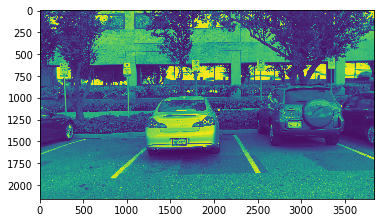

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(full_image)

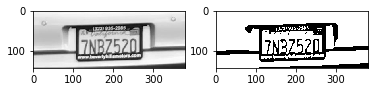

(23, 4, 62, 150)


/Users/vineevineela/anaconda2/envs/py36/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


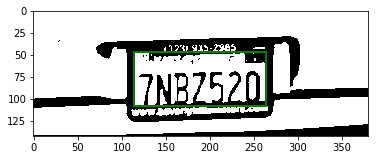

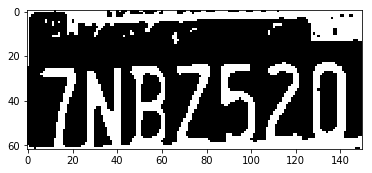

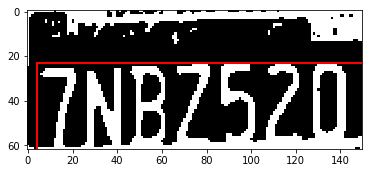

Character Segmentation Performed
Detected License Plate Number is:  7NBZ5ZI


In [17]:
license_plate = LicensePlate.license_plate(full_image)

In [18]:
license_plate

'7NBZ5ZI'

In [22]:
# Using ffmpeg to extract metadata of the video and save it in a text file
# Insert the video path given above in the path variable after -i in the below command. 
os.system("ffmpeg -i yolo-object-detection/Parking.MOV -f ffmetadata output/metadata.txt")

0

In [23]:
Entry_Time,Exit_Time,Creation_Date,Charge = Parking_Charge.parking_charge(output_csv_file)

Parking Charge is: 1.5 $


In [24]:
output = pd.DataFrame({'Date':[Creation_Date],'Entry_Time':[Entry_Time],'Exit_Time':[Exit_Time],
            'License Plate': [license_plate], 'Parking_Charge': [Charge]})

In [25]:
output

,Date,Entry_Time,Exit_Time,License Plate,Parking_Charge
0,2018-09-20,16:58:19,17:01:04.997000,7NBZ5ZI,1.5


In [26]:
output.to_csv("output/Parking_Sheet.csv")